<a href="https://colab.research.google.com/github/CristofherSebastianPalominoFano/Complejidad-Algoritmica-2022/blob/main/sesion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Problema de la rata en un laberinto usando el retroceso

In [ ]:
n = 4

def isSafe(maze, x, y):
    if x >= 0 and x < n and y >= 0 and y < n and maze[x][y] == 1:
        return True
     
    return False
    
def SolveMazeUtil(maze, x, y, sol):
    #If x and y is the goal then return True from here only
    if x== n-1 and y==n-1 and maze[x][y] == 1:
        sol[x][y] = 1
        return True
        
    #check if x-Y pos is valid
    if isSafe(maze, x, y):
        #if it is already part of sol
        if sol[x][y] == 1:
            return False
        
        #mark x-y as safe
        sol[x][y] = 1
        
        #Move Forward in X-dir
        if SolveMazeUtil(maze, x+1, y, sol):
            return True
            
        #If x does not give sol then try to move in Y dir
        if SolveMazeUtil(maze, x, y+1, sol):
            return True
            
        #If moving forward in either X-Y does not give sol then Backtrack
        if SolveMazeUtil(maze, x-1, y, sol):
            return True
        
        if SolveMazeUtil(maze, x, y-1, sol):
            return True
            
        sol[x][y] = 0
        return False
        
def solveMaze(maze):
    sol = [[0 for j in range(4)] for i in range(4)]
    if SolveMazeUtil(maze, 0, 0, sol) == False:
        print("Solution doesn't exist");
        return False
     
    #print(sol)
    return True

In [ ]:
maze = [[1, 0, 0, 0],
        [1, 1, 0, 1],
        [0, 1, 0, 0],
        [1, 1, 1, 1] 
       ]
              
print(solveMaze(maze))
assert solveMaze(maze) == True

True


2) El problema del rompecabezas N-Queens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


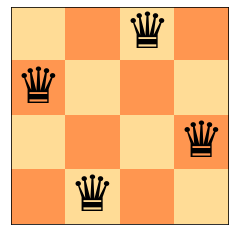

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw(board):
  n = len(board)
  b = np.zeros((n, n, 3), dtype=np.int)
  b += [255, 150, 80]
  b[::2, ::2] = [255, 220, 150]
  b[1::2, 1::2] = [255, 220, 150]

  _, ax = plt.subplots()
  ax.imshow(b)
  for row, col in enumerate(board):
    ax.text(col, row, u"\u265b", fontsize=200/n, va="center", ha="center")

  ax.set(xticks=[], yticks=[])
  ax.axis("image")
draw([ 2, 0, 3, 1])

In [ ]:
def valid(board, row, col):
  n = len(board)
  for row_i in range(row):
    col_i = board[row_i]
    delta = row - row_i
    if col_i == col or col_i - delta == col or col_i + delta == col:
      return False
  
  return True

def nqueens(board, row):
  n = len(board)
  if row == n:
    draw(board)
  else:
    for col_i in range(n):
      if valid(board, row, col_i):
        board[row] = col_i
        nqueens(board, row + 1)
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


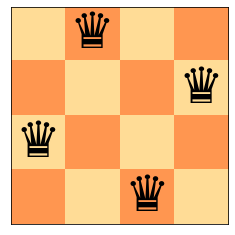

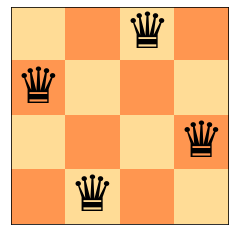

In [ ]:
n = 4
nqueens([-1]*n, 0)

In [ ]:
def nQueens(n):
    res = []

    def isSafe(mat, row, col):
        for i in range(row):
            if mat[i][col] == 1:
                return False
            
        #check if queen already present in upper left diagonal
        i, j = row, col
        while i>=0 and j >= 0:
            if mat[i][j] == 1:
                return False
            i = i-1
            j = j-1
            
        #check for upper right diagonal        
        i, j = row, col
        while i>=0 and j<len(mat):
            if mat[i][j] == 1:
                return False
            i = i-1
            j = j+1
        return True
    
    #function to add solution
    def addSolution(chessboard):
        currans = []
        for i in chessboard:
            currans.extend(i)
        res.append(currans)
    
    #recursive function
    def SolveNQueens(mat, row):
        if row == len(mat):
            addSolution(mat)
            return

        for i in range(len(mat)):
            if isSafe(mat, row, i):
                mat[row][i] = 1

                SolveNQueens(mat, row+1)

                mat[row][i] = 0
    
    
    mat = [[0 for _ in range(n)] for _ in range(n)]
    SolveNQueens(mat, 0)
    return res

n = 4
res = nQueens(n)
print(res)

[[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]]
